# Load data and plot

An example of how to load data quickly so it can be transformed into other forms etc.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path
from multiprocessing import Pool

import matplotlib.pyplot as plt
import scmdata
import seaborn as sns
import tqdm.autonotebook as tqdman

<ipython-input-2-4057e79c21ce>:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [4]:
STITCHED_DIR = "./country-crunch-stitched"
STITCHED_NORMALISED_DIR = "./country-crunch-stitched-normalised"

STITCHED_DIR = "./country-crunch-stitched-popn-weighted"
STITCHED_NORMALISED_DIR = "./country-crunch-stitched-normalised-popn-weighted"

MAX_WORKERS = 60

<IPython.core.display.Javascript object>

In [5]:
load_dir = STITCHED_DIR
load_dir = STITCHED_NORMALISED_DIR

<IPython.core.display.Javascript object>

In [6]:
crunched_files = [
    f
    for f in glob.glob(os.path.join(load_dir, "**", "*.nc"), recursive=True)
    if "ssp" in f
]
crunched_files[:2]
crunched_files

['./country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp585_r2i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp370_r1i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-ESM1-5_ssp126_r3i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-ESM1-5_ssp245_r2i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp126_r1i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-ESM1-5_ssp126_r2i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp126_r2i1p1f1_gn_185001-210012.nc',
 './country-crunch-stitched-normalised-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp370_r2i1p1f1_gn_185001-210012.nc',
 './country-cru

<IPython.core.display.Javascript object>

In [7]:
[f for f in crunched_files if "MRI-ESM2-0" in f]

[]

<IPython.core.display.Javascript object>

In [8]:
dud_files = [
    "{}/netcdf-scm_tas_Amon_MRI-ESM2-0_ssp370-lowNTCF_r1i1p1f1_gn_185001-205512.nc".format(
        load_dir
    )
]
crunched_files = [f for f in crunched_files if f not in dud_files]

<IPython.core.display.Javascript object>

In [9]:
def load_file(f):
    return scmdata.ScmRun.from_nc(f)


all_dat = []
with Pool(MAX_WORKERS) as pool:
    all_dat = pool.map(load_file, crunched_files)

all_dat = scmdata.run_append(
    [scmdata.ScmRun(s.timeseries(time_axis="year-month")) for s in tqdman.tqdm(all_dat)]
)
# all_dat is an ScmRun object, might be useful
# alternately, the below gives you a pandas dataframe
all_dat_df = all_dat.timeseries()
all_dat_df

  0%|          | 0/24 [00:00<?, ?it/s]

time                                                                                                                                                         1850-01-16 05:00:00  \
activity_id climate_model grid member_id mip_era model       region                                           scenario unit variable variable_standard_name                        
ScenarioMIP ACCESS-CM2    gn   r2i1p1f1  CMIP6   unspecified Popn weighted World                              ssp585   K    tas      air_temperature                   -7.708001   
                                                             Popn weighted World|Natural Earth 50m|Australia  ssp585   K    tas      air_temperature                    5.195718   
                                                             Popn weighted World|Natural Earth 50m|Canada     ssp585   K    tas      air_temperature                  -15.390313   
                                                             Popn weighted World|Natural Earth 50m|Chile      ssp585   K    tas      air_temperature                    7.319127   
                                                             Popn weighted World|Natural Earth 50m|France     ssp585   K    tas      air_temperature                   -8.894254   
...                                                                                                                                                                          ...   
            ACCESS-ESM1-5 gn   r1i1p1f1  CMIP6   unspecified World|Natural Earth 50m|Chile                    ssp245   K    tas      air_temperature                    3.501443   
                                                             World|Natural Earth 50m|France                   ssp245   K    tas      air_temperature                   -4.234037   
                                                             World|Natural Earth 50m|Russia                   ssp245   K    tas      air_temperature                  -19.730860   
                                                             World|Natural Earth 50m|United States of America ssp245   K    tas      air_temperature                  -12.526216   
                                                             World|Natural Earth 50m|Zimbabwe                 ssp245   K    tas      air_temperature                    2.555200   

time                                                                                                                                                         1850-02-15 15:00:00  \
activity_id climate_model grid member_id mip_era model       region                                           scenario unit variable variable_standard_name                        
ScenarioMIP ACCESS-CM2    gn   r2i1p1f1  CMIP6   unspecified Popn weighted World                              ssp585   K    tas      air_temperature                   -5.540605   
                                                             Popn weighted World|Natural Earth 50m|Australia  ssp585   K    tas      air_temperature                    4.937526   
                                                             Popn weighted World|Natural Earth 50m|Canada     ssp585   K    tas      air_temperature                  -14.340847   
                                                             Popn weighted World|Natural Earth 50m|Chile      ssp585   K    tas      air_temperature                    8.189898   
                                                             Popn weighted World|Natural Earth 50m|France     ssp585   K    tas      air_temperature                   -5.714859   
...                                                                                                                                                                          ...   
            ACCESS-ESM1-5 gn   r1i1p1f1  CMIP6   unspecified World|Natural Earth 50m|Chile                    ssp245   K    tas      air_temperature                    3.903788   
                                       

<IPython.core.display.Javascript object>

In [10]:
cms = all_dat.get_unique_meta("climate_model")
display(len(cms))
sorted(cms)

2

['ACCESS-CM2', 'ACCESS-ESM1-5']

<IPython.core.display.Javascript object>

In [11]:
print("\n".join(sorted(cms)))

ACCESS-CM2
ACCESS-ESM1-5


<IPython.core.display.Javascript object>

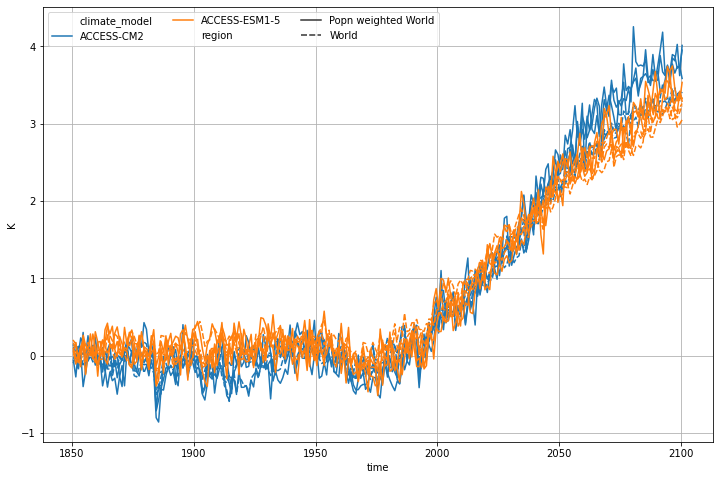

<IPython.core.display.Javascript object>

In [12]:
ax = (
    all_dat.time_mean("AC").filter(region="*World")  # , year=range(2010, 2020 + 1))
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    .filter(scenario="ssp245")
    #     .filter(climate_model="FIO*")
    .lineplot(
        style="region",
        hue="climate_model",
        hue_order=sorted(cms),
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()
# ax.axvline(2014.5)

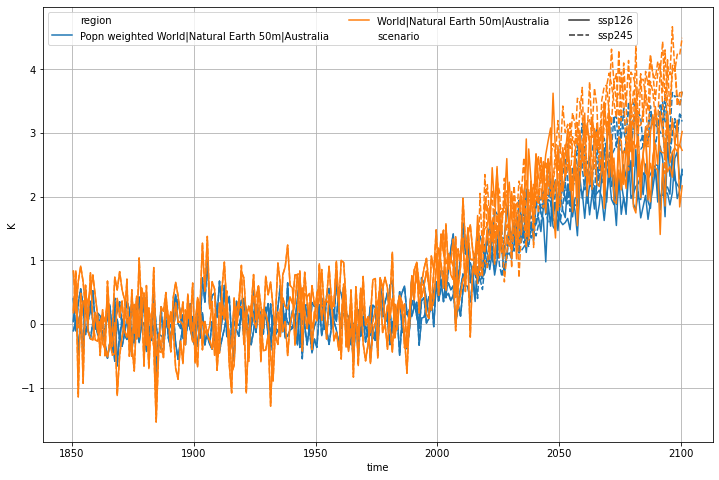

<IPython.core.display.Javascript object>

In [13]:
ax = (
    all_dat.time_mean("AC")
    #     .filter(region="*World")
    #     .filter(region="*World*France*")
    .filter(region="*World*Australia*")
    .filter(scenario=["ssp119", "ssp126", "ssp245"])
    #     .filter(scenario="ssp245")
    .filter(climate_model="ACCESS-CM2")
    .lineplot(
        hue="region",
        style="scenario",
        #         hue_order=sorted(cms),
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()
# ax.axvline(2014.5)

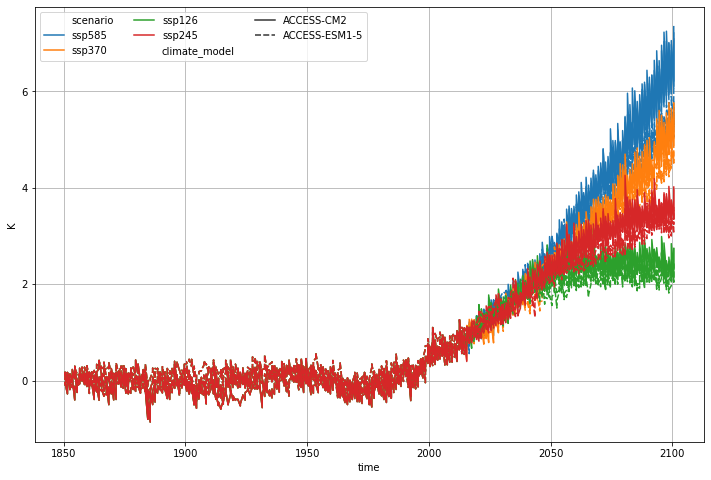

<IPython.core.display.Javascript object>

In [14]:
ax = (
    all_dat.time_mean("AC").filter(
        region="*World", climate_model="ACCESS*"
    )  # , year=range(2010, 2020 + 1))
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    #     .filter(scenario="ssp245")
    #     .filter(climate_model="FIO*")
    .lineplot(
        hue="scenario",
        style="climate_model",
        #         hue_order=sorted(cms),
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()
# ax.axvline(2014.5)

In [15]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat.filter(year=mean_years)
    .time_mean("AC")
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean
0,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Popn weighted World,ssp585,K,tas,air_temperature,6.422096
1,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Australia,ssp585,K,tas,air_temperature,5.323580
2,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Canada,ssp585,K,tas,air_temperature,7.302592
3,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Chile,ssp585,K,tas,air_temperature,5.588190
4,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|France,ssp585,K,tas,air_temperature,6.382695
...,...,...,...,...,...,...,...,...,...,...,...,...
379,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Chile,ssp245,K,tas,air_temperature,2.652709
380,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|France,ssp245,K,tas,air_temperature,4.214788
381,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Russia,ssp245,K,tas,air_temperature,5.424659
382,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|United States of America,ssp245,K,tas,air_temperature,4.007403


<IPython.core.display.Javascript object>

In [16]:
tmp = bardf[bardf["region"] == "World"][["scenario", "climate_model"]].drop_duplicates()
tmp["scenario"].value_counts()

ssp370    2
ssp245    2
ssp585    2
ssp126    2
Name: scenario, dtype: int64

<IPython.core.display.Javascript object>

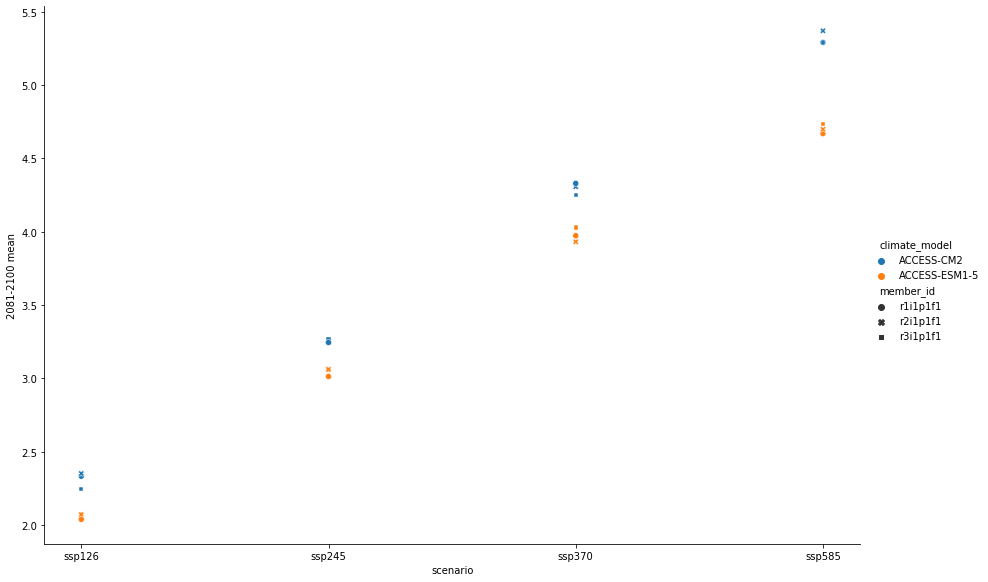

<IPython.core.display.Javascript object>

In [17]:
sns.relplot(
    data=bardf[bardf["region"] == "World"].sort_values(by="scenario"),
    #     x="climate_model",
    #     y="value",
    #     hue="scenario",
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    style="member_id",
    style_order=sorted(bardf["member_id"].unique().tolist()),
    #     estimator="median",
    height=8,
    aspect=1.5,
    #     kind="line",
    #     marker="x",
)

In [18]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat.filter(year=mean_years)
    .time_mean("AC")
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf["Population weighted"] = bardf["region"].str.contains("Popn weighted")
bardf["region"] = bardf["region"].str.replace("Popn weighted ", "")
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean,Population weighted
0,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,World,ssp585,K,tas,air_temperature,6.422096,True
1,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Australia,ssp585,K,tas,air_temperature,5.323580,True
2,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Canada,ssp585,K,tas,air_temperature,7.302592,True
3,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Chile,ssp585,K,tas,air_temperature,5.588190,True
4,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|France,ssp585,K,tas,air_temperature,6.382695,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Chile,ssp245,K,tas,air_temperature,2.652709,False
380,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|France,ssp245,K,tas,air_temperature,4.214788,False
381,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Russia,ssp245,K,tas,air_temperature,5.424659,False
382,ScenarioMIP,ACCESS-ESM1-5,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|United States of America,ssp245,K,tas,air_temperature,4.007403,False


<IPython.core.display.Javascript object>

done


<ipython-input-19-1475d6a7bad3>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)


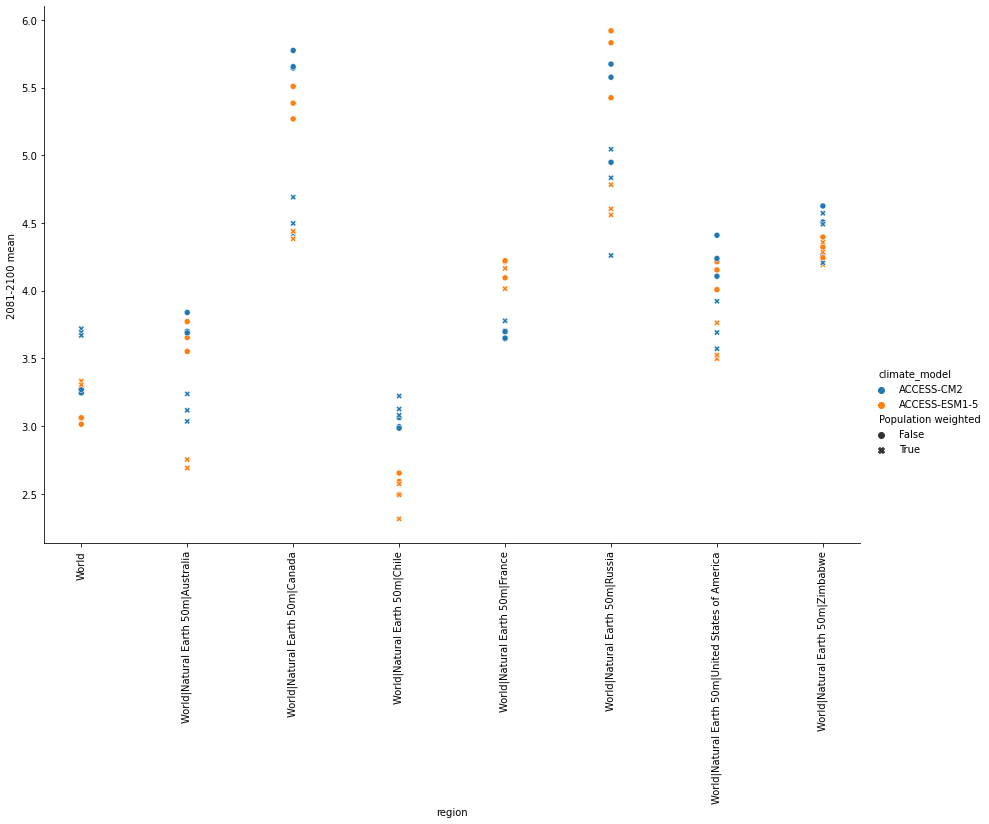

<IPython.core.display.Javascript object>

In [19]:
fg = sns.relplot(
    data=bardf[bardf["scenario"] == "ssp245"].sort_values(by="region"),
    #     x="climate_model",
    #     y="value",
    #     hue="scenario",
    x="region",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    style="Population weighted",
    #     style_order=sorted(bardf["member_id"].unique().tolist()),
    #     estimator="median",
    height=8,
    aspect=1.5,
    #     kind="line",
    #     marker="x",
)
fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)
print("done")